# Ghana Health Infrastructure
With this data I will seek to undrstand the current health infrastructure and its layout in the country. This dataset is provided as part of Citizen Data Science project, to gather & provide fairly clean data.

For our visualization we'll use Matplotlib for beginning exploratory plots and move along to Plotly for digging deeper with their interactive features and ease of geo scatter plotting.

# Data Loading & Cleaning
First we'll load in the data and clean it up as needed.

In [1]:
# Importing packages and loading data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

fac = pd.read_csv('../input/health-facilities-gh/health-facilities-gh.csv')

tier = pd.read_csv('../input/health-facilities-gh/health-facility-tiers.csv')

In [2]:
# First look at our data

fac.info

<bound method DataFrame.info of        Region          District             FacilityName           Type  \
0     Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1     Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2     Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3     Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4     Ashanti            Kwabre     Aboaso Health Centre  Health Centre   
...       ...               ...                      ...            ...   
3751  Western  Sefwi-Akontombra           Ackaakrom CHPS           CHPS   
3752  Western  Sefwi-Akontombra             Apprutu CHPS           CHPS   
3753  Western  Sefwi-Akontombra            Kojokrom CHPS           CHPS   
3754  Western  Sefwi-Akontombra             Yawkrom CHPS           CHPS   
3755  Western  Sefwi-Akontombra            Kofikrom CHPS           CHPS   

              Town   Ownership  Latitude  Longitude  
0         Afr

In [3]:
# We'll condense the Type column along with the Ownership column to make our analysis more readable.

fac['Type'].unique()

array(['Clinic', 'Health Centre', 'Maternity Home', 'CHPS', 'Hospital',
       'District Hospital', 'Centre', 'RCH', 'Training Institution',
       'Municipal Health Directorate', 'Teaching Hospital',
       'Regional Hospital', 'CPHS', 'District Health Directorate',
       'Regional Health Directorate', 'Polyclinic', 'Municipal Hospital',
       'Municipal  Health Directorate', 'Metropolitan Hospital',
       'Metropolitan Health Directorate', 'DHD', 'Psychiatric Hospital',
       'Research Institution', 'Others', 'clinic'], dtype=object)

In [4]:
fac['Ownership'].unique()

array(['CHAG', 'Private', 'Government', 'Quasi-Government', 'Islamic',
       'Muslim', 'Maternity Home', 'Clinic', 'private', 'NGO',
       'government', 'Mission'], dtype=object)

In [5]:
# Cleaning up Type and Ownership.

array_clinic = ['Clinic', 'clinic', 'Polyclinic']
array_chps = ['CHPS', 'CPHS']
array_teaching = ['Training Institution', 'Teaching Hospital', 'Research Institution']
array_maternity = ['Maternity Home', 'RCH', 'DHD']
array_hospital = ['Hospital', 'Psychiatric Hospital']
array_ghs = ['Municipal Health Directorate', 'Municipal Hospital', 'Municipal  Health Directorate', 'Regional Hospital', 'Regional Health Directorate', 'District Hospital', 'District Health Directorate', 'Metropolitan Hospital', 'Metropolitan Health Directorate']
array_centre = ['Health Centre', 'Centre']
array_other = ['Others']
array_private = ['Private', 'Metropolitan Hospital', 'Metropolitan Health Directorate', 'private', 'NGO', 'Maternity Home', 'Islamic', 'Muslim', 'Mission', 'Clinic']
array_government = ['Government', 'government']

fac['Type'] = fac['Type'].replace(array_clinic, 'Clinic')
fac['Type'] = fac['Type'].replace(array_chps, 'CHPS')
fac['Type'] = fac['Type'].replace(array_teaching, 'Teaching')
fac['Type'] = fac['Type'].replace(array_maternity, 'Maternity')
fac['Type'] = fac['Type'].replace(array_hospital, 'Hospital')
fac['Type'] = fac['Type'].replace(array_ghs, 'GHS')
fac['Type'] = fac['Type'].replace(array_centre, 'Health Centre')
fac['Type'] = fac['Type'].replace(array_other, 'Other')
fac['Ownership'] = fac['Ownership'].replace(array_private, 'Private')
fac['Ownership'] = fac['Ownership'].replace(array_government, 'Government')

In [6]:
tier.info

<bound method DataFrame.info of           Region                   Facility  Tier
0        Ashanti    PEACE AND LOVE HOSPITAL     2
1        Ashanti             TODAH HOSPITAL     2
2        Ashanti  ASOKWA CHILREN'S HOSPITAL     2
3        Ashanti       FANKYEBEBRA HOSPITAL     2
4        Ashanti           MICHMIT HOSPITAL     2
...          ...                        ...   ...
1470  Upper East   TEMPANE COMMUNITY CLINIC     3
1471  Upper East         M.A. MODERN CLINIC     3
1472  Upper East             VALERIA CLINIC     3
1473  Upper East     QUALITY MEDICAL CENTRE     3
1474  Upper East        NAABA SUGURU CLINIC     3

[1475 rows x 3 columns]>

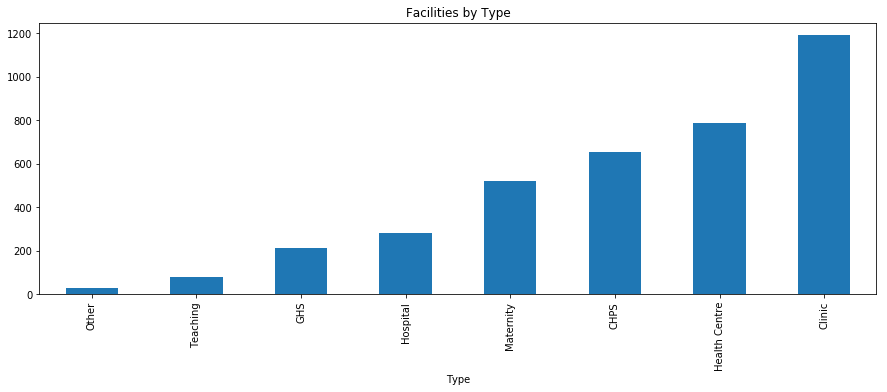

In [7]:
# Quick breakdown by Facility Type.

fac.groupby('Type').count()['FacilityName'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title='Facilities by Type')
plt.show()

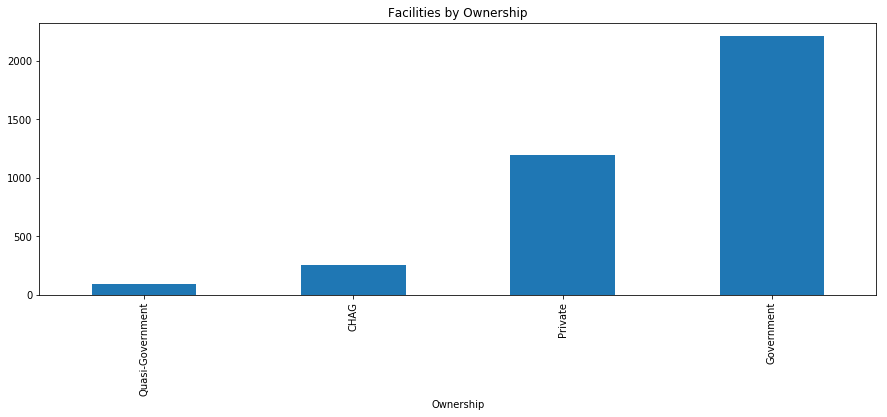

In [8]:
# Quick look at Ownership.

fac.groupby('Ownership').count()['FacilityName'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title='Facilities by Ownership')
plt.show()

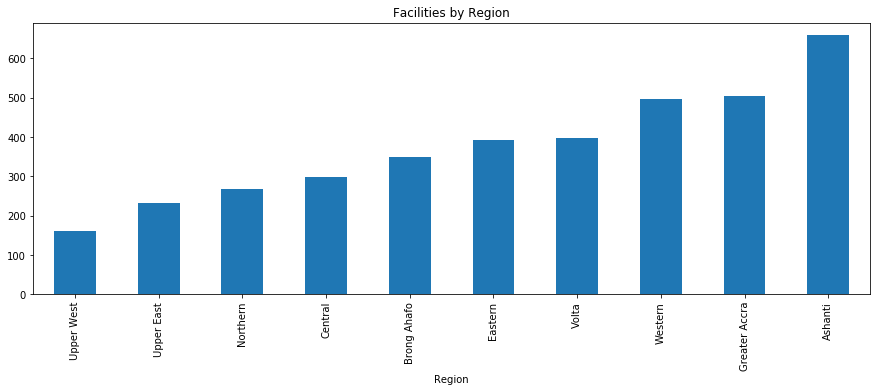

In [9]:
# Categorized by Region.

fac.groupby('Region').count()['FacilityName'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title='Facilities by Region')
plt.show()

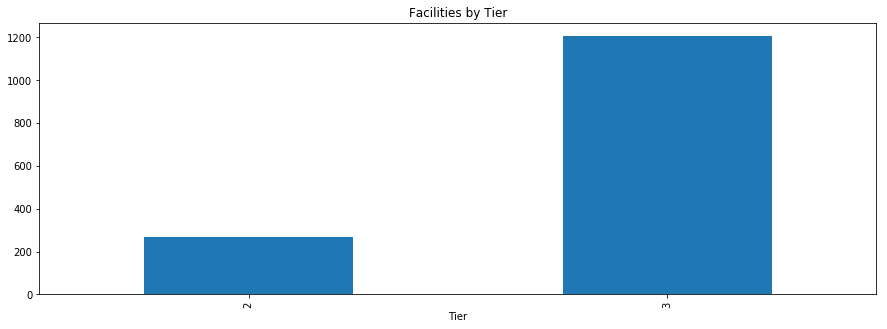

In [10]:
# Lastly for our beginning exploratory analysis - facilities by tier.

tier.groupby('Tier').count()['Facility'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title='Facilities by Tier')
plt.show()

# Analysis
Let's do some deeper visualization of our data by region to see what we can find.

In [11]:
lab = fac['Ownership'].value_counts().keys().tolist()
val = fac['Ownership'].value_counts().values.tolist()
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['blue', 'red', 'orange', 'cyan']), 
                hoverinfo='value')
data = [trace]
layout = go.Layout(title='Facility Ownership')
fig = go.Figure(data = data,layout = layout)
fig.show()

This pie graph gives some quick insight on the ownership distribution in Ghana. Hover over each section to be able to see the number of facilities, and play with clicking in the legend to isolate certain ownerships.

In [12]:
fig = px.bar(fac, x='Region', y='FacilityName', color='Type')
fig.update_layout(title='Facilities by Type')
fig.show()

The Western region has the highest amount of both CHPS and GHS facilities which are govnernment-owned. Greater Accra contains an overwhelming majority of the hospitals.

In [13]:
fig = px.bar(tier, x='Region', y='Tier')
fig.update_layout(title='Facilities by Tier')
fig.show()

Regions with the most facilities have majority privately owned facilites. These are also the more populated areas, so this makes sense.


# Mapping the Data
Now that we've been able to find some interesting information on the infastructure by region, let's take our visualization a step further and map our findings.

In [14]:
# Joining our tables for mapping Tiers. Converting facility name to upper to be able to join on these values.

fac['FacilityName'] = fac['FacilityName'].str.upper() 

fac_detail = pd.merge(fac, tier, left_on=  ['FacilityName'],
                                 right_on= ['Facility'], 
                                 how = 'inner')

fac_detail = fac_detail.drop('Region_y', axis=1)
fac_detail = fac_detail.drop('Facility', axis=1)
fac_detail.rename(columns = {'Region_x' : 'Region'}, inplace=True)

In [15]:
# Categorizing the facilities by Type.

fig = px.scatter_geo(data_frame=fac, scope='africa',lat='Latitude',lon='Longitude',
                     color='Type', color_continuous_scale='Sunsetdark')
fig.update_layout(title_text = 'Ghana Health Facilities by Type')

fig.show()

It can be hard to draw any analyses with all the types selected, but as we isolate some with Plotly we can begin to find some trends. Almost all of the hospitals for example are in the southern half of the country. CHPS seems to be the type with the most facilities in the northern regions.

In [16]:
fig = px.scatter_geo(data_frame=fac, scope='africa',lat='Latitude',lon='Longitude',
                     color='Ownership', color_continuous_scale='Sunsetdark')
fig.update_layout(title_text = 'Ghana Health Facilities by Ownership')

fig.show()

Private facilities are almost exclusively in the bottom half of the country. Government has a large spread throughout.

In [17]:
fig = px.scatter_geo(data_frame=fac_detail, scope='africa', lat='Latitude', lon='Longitude',
                     color='Tier', color_continuous_scale='Sunsetdark', title='Ghana Health Facilities by Tier')
fig.update_layout(title_text = 'Ghana Health Facilities by Tier')

fig.show()

We don't have much tier information for the northern regions of the country, but of what we do have we can see that Tier 2 facilities are primarily in the southern regions and along the coast.

# Conclusion

We sought to explore Ghana's health infastructure with the data provided. With help from Plotly's interactive visualizations, we can see a few things. 
- The majority of the facilities in the country are government-owned. 
- Most of the facilities are Tier 3 with <1,000 patients per month.
- Clinics are the most common facility type.
- The southern and coastal areas of Ghana have the most infastructure in place and Tier 2 facilities.
- Most government owned facilites are spread out and further north in the country.